In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal', 'Density']

C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Signal', ylabel='Density'>

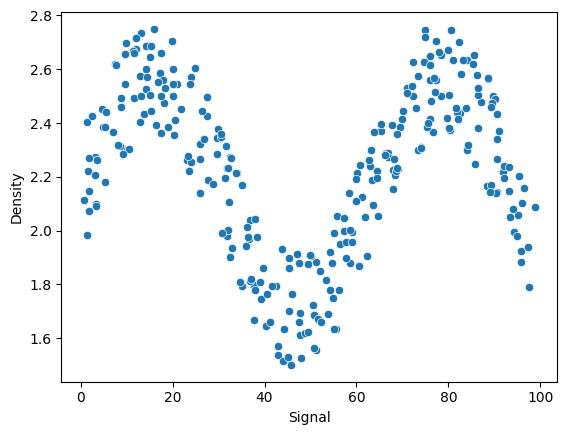

In [5]:
sns.scatterplot(x = 'Signal', y = 'Density', data = df)

In [14]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
lr_preds = lr_model.predict(X_test)

In [19]:
lr_preds

array([[2.22029657],
       [2.22047771],
       [2.22035637],
       [2.22034337],
       [2.22039737],
       [2.22050555],
       [2.22042659],
       [2.22028877],
       [2.22034673],
       [2.22029714],
       [2.22041506],
       [2.22050153],
       [2.22043891],
       [2.22042003],
       [2.22047022],
       [2.22032403],
       [2.22033377],
       [2.22030628],
       [2.22035154],
       [2.22035373],
       [2.22029266],
       [2.22036798],
       [2.22033018],
       [2.22030611],
       [2.22042754],
       [2.22044019],
       [2.2204142 ],
       [2.22040303],
       [2.22048946],
       [2.22047495]])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [23]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

In [27]:
signal_range = np.arange(0, 100)

In [28]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [29]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


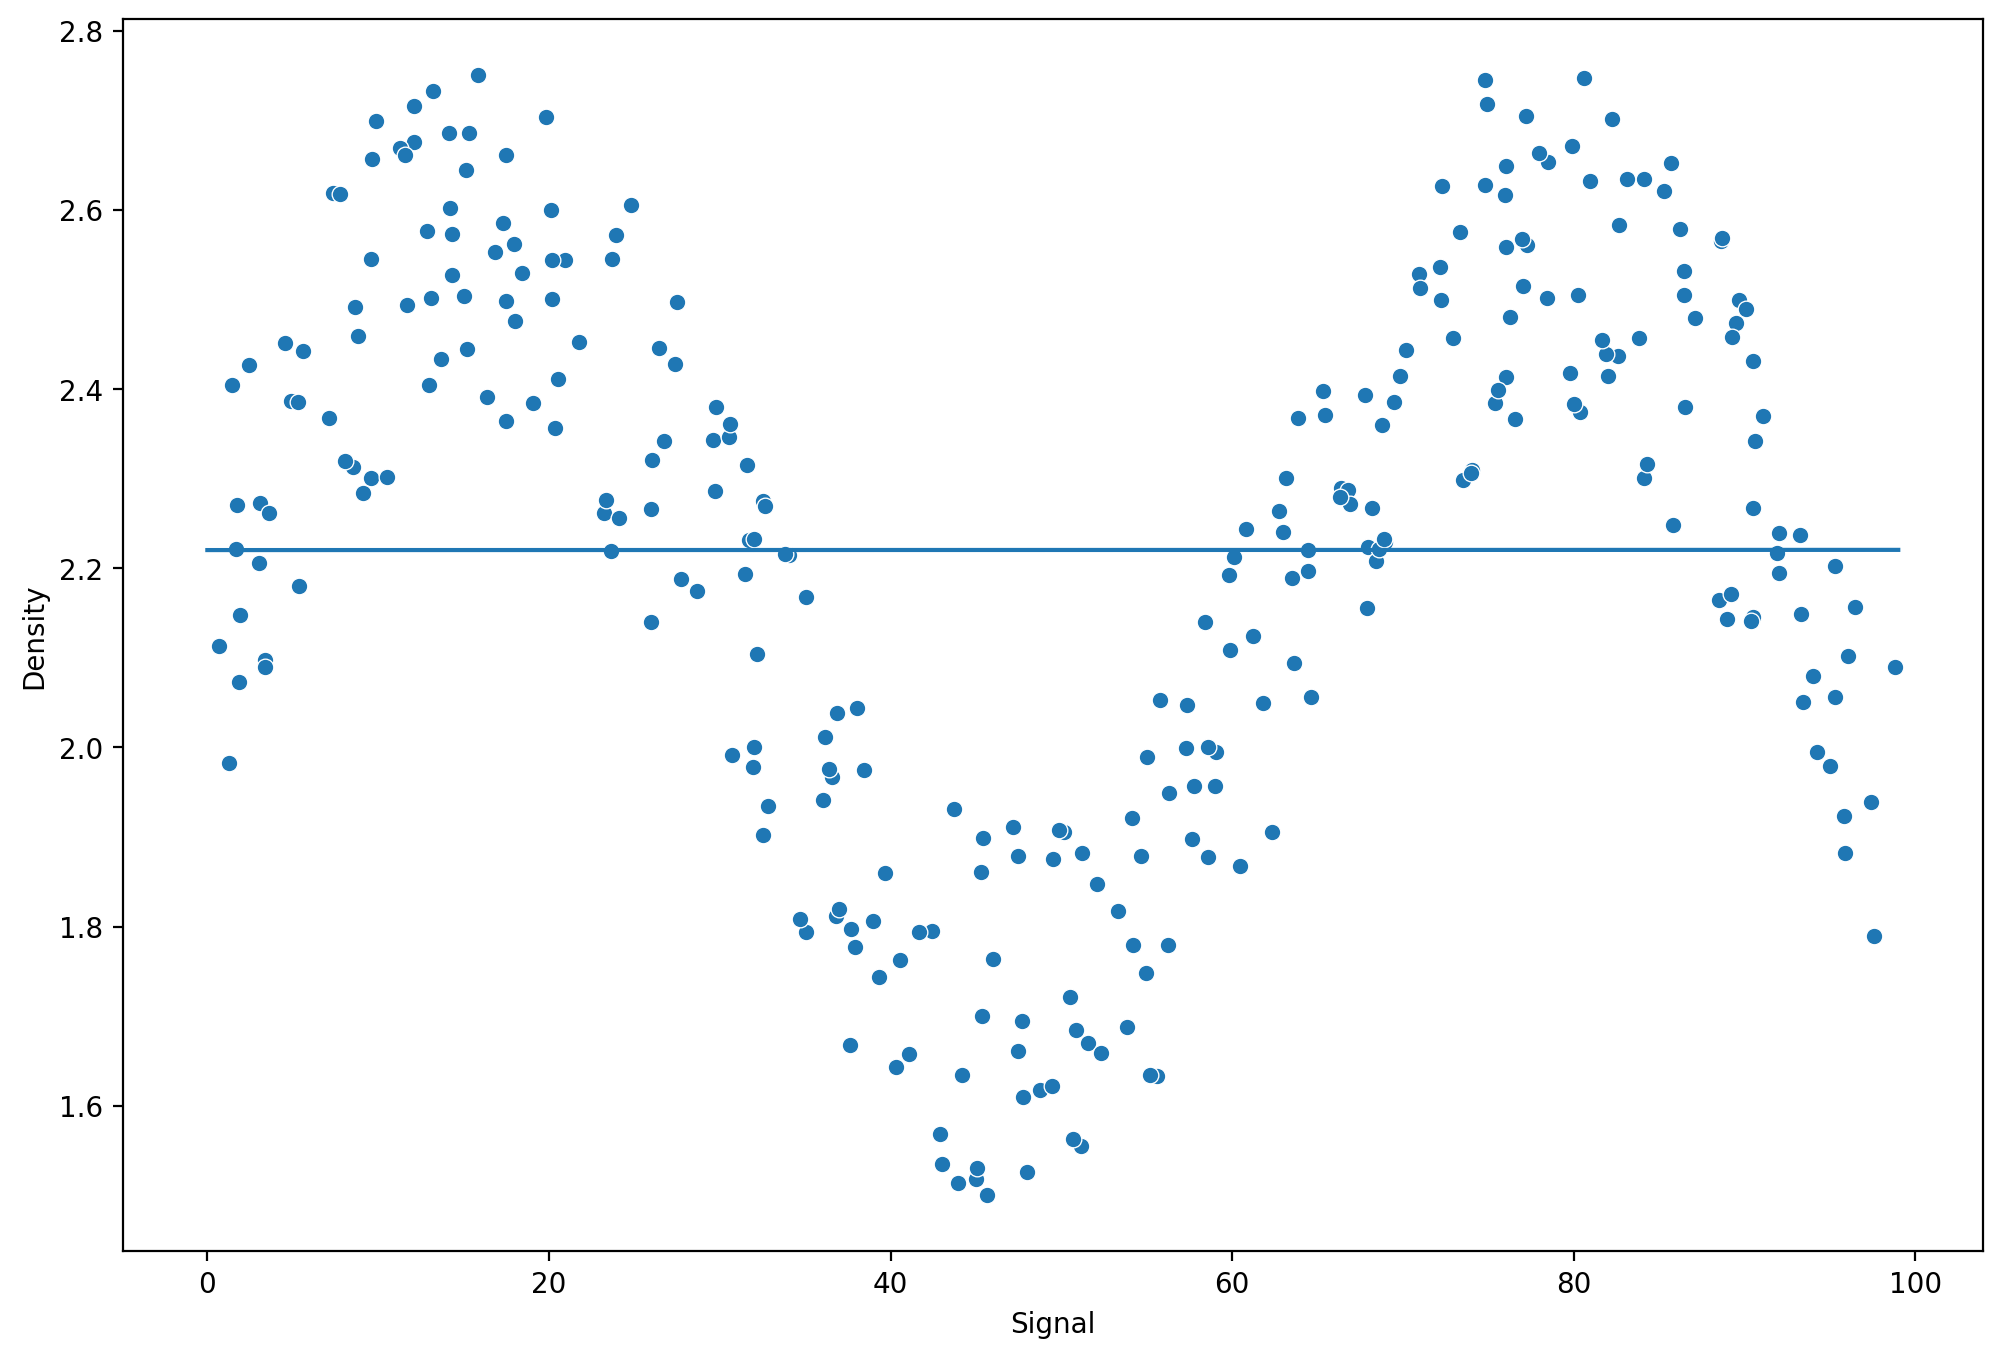

In [31]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.scatterplot(x = 'Signal', y = 'Density', data = df)
plt.plot(signal_range, signal_preds)

In [35]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize = (12, 8), dpi = 200)
    sns.scatterplot(x = 'Signal', y = 'Density', data = df, color = 'black')
    
    plt.plot(signal_range, signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X1 gen 9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


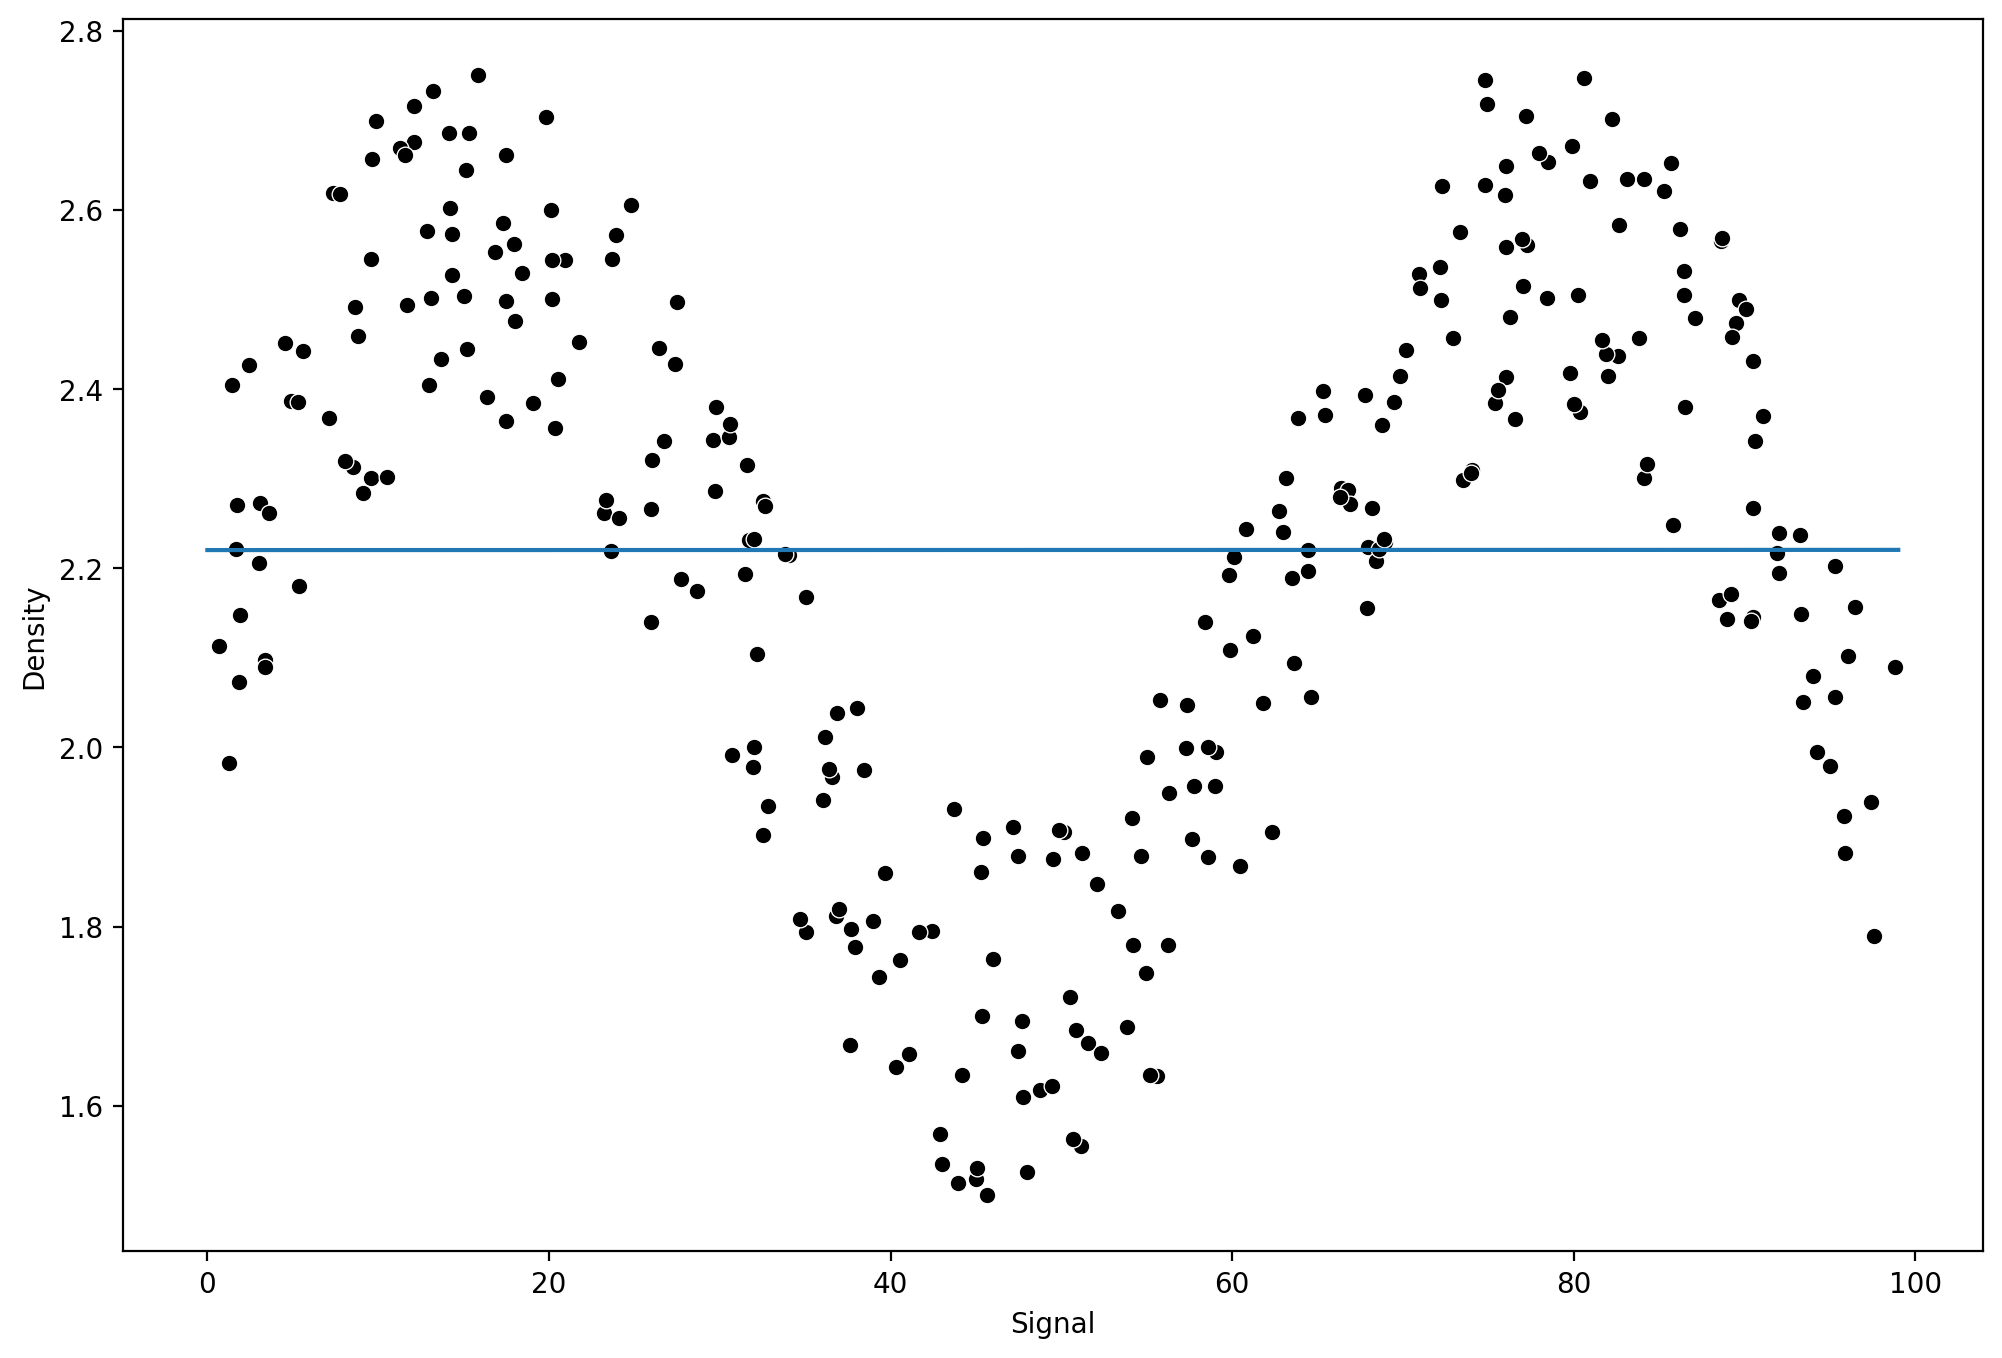

In [36]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)